In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
fp_test = 'video-snapshots-deterministic-64x7-fix-grad/snapshots-fxf-AST-UNCERTAIN-E20-ADAMW-1E-3-test-w-True-NOSTEP/results/test/sigma_test.npy'

In [3]:
sigma_test = np.load(fp_test,allow_pickle=True)

In [4]:
sigma_test[0]

array([array([[5.2558107e-06],
              [2.9275548e-06],
              [1.8149443e-05],
              [3.0485453e-05],
              [1.0270734e-05],
              [3.5712299e-06],
              [7.7651821e-06],
              [8.1706527e-13],
              [5.9631501e-11],
              [1.3825394e-10],
              [1.1784572e-10],
              [3.0470250e-16],
              [6.2014663e-14],
              [6.1756400e-14],
              [3.8028747e-04],
              [2.8185904e-04]], dtype=float32),
       list([b'../stroke_data/fix_len_aud/segment/0237/01.wav', b'../stroke_data/fix_len_aud/segment/0237/02.wav', b'../stroke_data/fix_len_aud/segment/0237/03.wav', b'../stroke_data/fix_len_aud/segment/0237/04.wav', b'../stroke_data/fix_len_aud/segment/0237/05.wav', b'../stroke_data/fix_len_aud/segment/0237/06.wav', b'../stroke_data/fix_len_aud/segment/0237/07.wav', b'../stroke_data/fix_len_aud/segment/0240/01.wav', b'../stroke_data/fix_len_aud/segment/0240/02.wav', b'../stroke_dat

In [21]:
tmp = sigma_test[0][1]
tmp_id = [t.decode('utf-8').split('/')[-2]+'_'+t.decode('utf-8').split('/')[-1].split('.')[0] for t in tmp]
tmp_id

['0237_01',
 '0237_02',
 '0237_03',
 '0237_04',
 '0237_05',
 '0237_06',
 '0237_07',
 '0240_01',
 '0240_02',
 '0240_03',
 '0240_04',
 '0240_05',
 '0240_06',
 '0240_07',
 '0241_01',
 '0241_02']

In [43]:
sigma_tmp

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

In [35]:
sigma_values = []
patient_ids = []
mri_labels = []
tri_labels = []
for s in sigma_test:
    sigma_tmp = s[0]
    tmp = s[1]
    pid = [t.decode('utf-8').split('/')[-2]+'_'+t.decode('utf-8').split('/')[-1].split('.')[0] for t in tmp]
    mri_tmp = s[2]
    tri_tmp = s[3]
    sigma_values.extend(sigma_tmp)
    patient_ids.extend(pid)
    mri_labels.extend(mri_tmp)
    tri_labels.extend(tri_tmp)

In [36]:
len(sigma_values), len(patient_ids),len(mri_labels)

(301, 301, 301)

In [23]:
sigma_values = sigma_test[0][0]
tmp = sigma_test[0][1]
patient_ids = [t.decode('utf-8').split('/')[-2]+'_'+t.decode('utf-8').split('/')[-1].split('.')[0] for t in tmp]
mri_labels = sigma_test[0][2]
triage_labels = sigma_test[0][3]

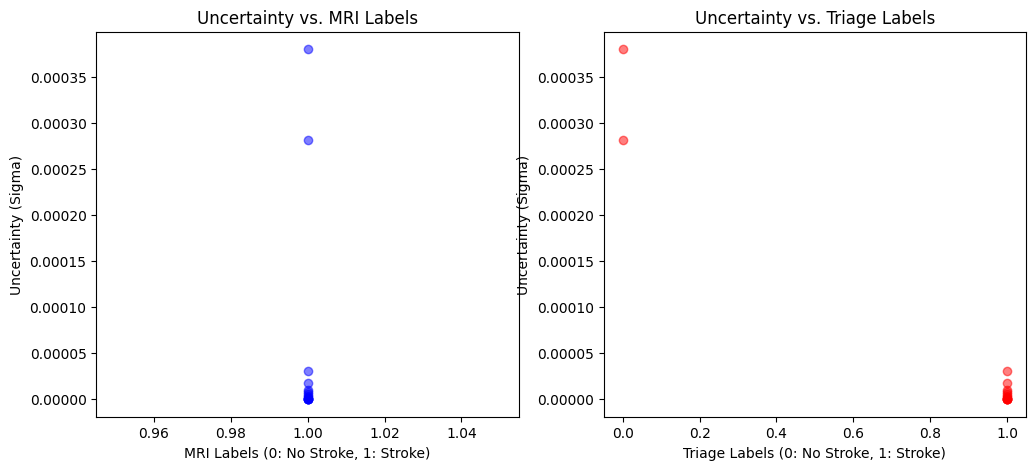

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot of Sigma vs. MRI Labels
ax[0].scatter(mri_labels, sigma_values, alpha=0.5, color='b')
ax[0].set_xlabel("MRI Labels (0: No Stroke, 1: Stroke)")
ax[0].set_ylabel("Uncertainty (Sigma)")
ax[0].set_title("Uncertainty vs. MRI Labels")

# Scatter plot of Sigma vs. Triage Labels
ax[1].scatter(triage_labels, sigma_values, alpha=0.5, color='r')
ax[1].set_xlabel("Triage Labels (0: No Stroke, 1: Stroke)")
ax[1].set_ylabel("Uncertainty (Sigma)")
ax[1].set_title("Uncertainty vs. Triage Labels")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sigma_vs_labels(data_list):
    """
    Visualizes sigma values against MRI and triage labels.
    
    data_list: List where
        - data_list[0] = sigma_values (tensor or list)
        - data_list[1] = patient_ids (list)
        - data_list[2] = MRI_labels (tensor or list)
        - data_list[3] = Triage_labels (tensor or list)
    """
    sigma_values = data_list[0].cpu().detach().numpy()  # Convert tensors to numpy if needed
    patient_ids = data_list[1]
    mri_labels = data_list[2].cpu().detach().numpy()
    triage_labels = data_list[3].cpu().detach().numpy()
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Scatter plot of Sigma vs. MRI Labels
    ax[0].scatter(mri_labels, sigma_values, alpha=0.5, color='b')
    ax[0].set_xlabel("MRI Labels (0: No Stroke, 1: Stroke)")
    ax[0].set_ylabel("Uncertainty (Sigma)")
    ax[0].set_title("Uncertainty vs. MRI Labels")

    # Scatter plot of Sigma vs. Triage Labels
    ax[1].scatter(triage_labels, sigma_values, alpha=0.5, color='r')
    ax[1].set_xlabel("Triage Labels (0: No Stroke, 1: Stroke)")
    ax[1].set_ylabel("Uncertainty (Sigma)")
    ax[1].set_title("Uncertainty vs. Triage Labels")

    plt.show()


In [2]:
mri = pd.read_csv('../v5.csv', dtype='object')
triage = pd.read_csv('../triage_gt.csv', dtype='object')
triage.ID = triage.ID.apply(lambda x: "%04d"%int(x))

## result analysis

## ast_peace

In [4]:
## snapshots-S4-MedIA-PEACE-UNCERTAIN-Sigma-FULL-LR-NOSTEP
pre = {'0237 stro': 1, '0240 stro': 1, '0241 stro': 1, '0242 stro': 1, '0243 stro': 1, '0244 stro': 1, '0245 stro': 1, '0247 stro': 1, '0248 stro': 1, '0249 stro': 1, '0250 stro': 1, '0252 stro': 1, '0253 stro': 1, '0255 stro': 1, '0256 stro': 1, '0257 stro': 1, '0258 stro': 1, '0260 stro': 1, '0262 stro': 1, '0264 stro': 1, '0266 stro': 1, '0267 stro': 1, '0275 stro': 1, '0277 stro': 1, '0279 stro': 1, '0284 stro': 1, '0286 stro': 1, '0290 stro': 1, '0293 stro': 1, '0294 stro': 1, '0238 nonstro': 1, '0246 nonstro': 1, '0251 nonstro': 1, '0261 nonstro': 1, '0263 nonstro': 0, '0265 nonstro': 1, '0268 nonstro': 1, '0269 nonstro': 1, '0273 nonstro': 1, '0281 nonstro': 1, '0287 nonstro': 1, '0288 nonstro': 1, '0295 nonstro': 1}

In [20]:
pre_id = [n[:4] for n in pre.keys()]
patient_id = []
for i in pre_id:
        patient_id.append(i)
df = pd.DataFrame()
df['test_ID'] = patient_id
df

,test_ID
0,0237
1,0240
2,0241
3,0242
4,0243
5,0244
6,0245
7,0247
8,0248
9,0249


In [19]:
type(triage[triage['ID']=='0237']['Triage']=='1')

pandas.core.series.Series

In [39]:
df['MRI_labels'] = [1 if f"{pid} stro" in pre else 0 for pid in patient_id]
df['MRI_prediction'] = [pre[f"{pid} stro"] if f"{pid} stro" in pre else 
                        pre[f"{pid} nonstro"] if f"{pid} nonstro" in pre else None 
                        for pid in patient_id]
#df['Triage_labels'] = [1 if (triage[triage['ID']==pid]['Triage']=='1') else 0 for pid in patient_id]
df

,test_ID,MRI_labels,Triage_labels,MRI_prediction
0,0237,1,1,1
1,0240,1,1,1
2,0241,1,0,1
3,0242,1,0,1
4,0243,1,0,1
5,0244,1,0,1
6,0245,1,0,1
7,0247,1,1,1
8,0248,1,1,1
9,0249,1,0,1


In [36]:
tri_test = []
for i, row in df.iterrows():
    pid = row['test_ID']
    #print(triage[triage['ID']==pid]['Triage'])
    tri_test.append(int(triage[triage['ID']==pid]['Triage']))

/var/tmp/ipykernel_66671/1081897685.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tri_test.append(int(triage[triage['ID']==pid]['Triage']))


In [40]:
df['Triage_labels'] = tri_test
df.head()

,test_ID,MRI_labels,Triage_labels,MRI_prediction
0,0237,1,1,1
1,0240,1,1,1
2,0241,1,0,1
3,0242,1,0,1
4,0243,1,0,1


In [48]:
gt = df['MRI_labels']
tri = df['Triage_labels']
pre = df['MRI_prediction']
pid = df['test_ID']

In [50]:

correct=0
incorrect =0
match=0
mismatch=0

dict1 = {}
dict2 = {}
dict3 = {}
for i, g in enumerate(gt):
    if pre[i]==g:
        correct+=1
        if tri[i]==g:
            match+=1
            dict1[pid[i]]=(g, tri[i])
            #print('correct, match', g)
            
        else:
            mismatch+=1
            dict2[pid[i]]=(g, tri[i])
            #print('correct, mismatch', g, tri[i])
    if pre[i]!=g:
        incorrect+=1
        dict3[pid[i]]=(g, tri[i])
         #print('incorrect, mri, tri', g, tri[i])
print('correct_match', match, dict1)
print('correct_mismatch', mismatch, dict2)
print('incorrect', incorrect, dict3)
         

correct_match 16 {'0237': (1, 1), '0240': (1, 1), '0247': (1, 1), '0248': (1, 1), '0253': (1, 1), '0257': (1, 1), '0258': (1, 1), '0260': (1, 1), '0262': (1, 1), '0275': (1, 1), '0279': (1, 1), '0284': (1, 1), '0286': (1, 1), '0290': (1, 1), '0293': (1, 1), '0294': (1, 1)}
correct_mismatch 15 {'0241': (1, 0), '0242': (1, 0), '0243': (1, 0), '0244': (1, 0), '0245': (1, 0), '0249': (1, 0), '0250': (1, 0), '0252': (1, 0), '0255': (1, 0), '0256': (1, 0), '0264': (1, 0), '0266': (1, 0), '0267': (1, 0), '0277': (1, 0), '0263': (0, 1)}
incorrect 12 {'0238': (0, 0), '0246': (0, 0), '0251': (0, 1), '0261': (0, 1), '0265': (0, 1), '0268': (0, 0), '0269': (0, 0), '0273': (0, 1), '0281': (0, 0), '0287': (0, 0), '0288': (0, 0), '0295': (0, 1)}


In [43]:
cm_pred_vs_mri = confusion_matrix(gt, pre)
print("Confusion Matrix (Prediction vs MRI):")
print(cm_pred_vs_mri)
print(classification_report(gt, pre))

Confusion Matrix (Prediction vs MRI):
[[ 1 12]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.71      1.00      0.83        30

    accuracy                           0.72        43
   macro avg       0.86      0.54      0.49        43
weighted avg       0.80      0.72      0.62        43



In [44]:
cm_triage_vs_mri = confusion_matrix(gt, tri)
print("Confusion Matrix (Triage vs MRI):")
print(cm_triage_vs_mri)
print(classification_report(gt, tri))

Confusion Matrix (Triage vs MRI):
[[ 7  6]
 [14 16]]
              precision    recall  f1-score   support

           0       0.33      0.54      0.41        13
           1       0.73      0.53      0.62        30

    accuracy                           0.53        43
   macro avg       0.53      0.54      0.51        43
weighted avg       0.61      0.53      0.55        43



### marlin_peace

## clean

In [5]:
mri.head()

,ID,GT
0,0001,0
1,0002,0
2,0003,1
3,0004,1
4,0005,0


In [8]:
triage.head()

,ID,Triage,GT
0,0003,NaN,1
1,0004,1,1
2,0005,1,0
3,0006,0,0
4,0007,1,1


In [9]:
mri.shape, triage.shape

((305, 2), (304, 3))

In [10]:
filtered_df = triage.dropna(ignore_index=True)
filtered_df

,ID,Triage,GT
0,0004,1,1
1,0005,1,0
2,0006,0,0
3,0007,1,1
4,0008,0,0
...,...,...,...
255,0307,0,1
256,0308,0,0
257,0309,0,1
258,0310,1,0


In [ ]:
pos = []
neg = []

for _, row in df.iterrows():
    tri_tmp=row['Triage']
    gt_tmp = row['GT']
    if row['ID'] in ['0018','0147','0193','0119','0259','0274','0188','0058','0036','0078','0283','0239']:
        continue
    if (tri_tmp=='0') & (pd.notnull(gt_tmp)):
        neg.append(row['ID'])
    if (tri_tmp=='1') & (pd.notnull(gt_tmp)):
        pos.append(row['ID'])

totallist = []
totallist.append([j for j in pos if int(j) < 196])
totallist.append([j for j in pos if (int(j) >= 196 and int(j) < 237)])
totallist.append([j for j in pos if int(j) >= 237 and int(j) < 296])
totallist.append([j for j in neg if int(j) < 196])
totallist.append([j for j in neg if (int(j) >= 196 and int(j) < 237)])
totallist.append([j for j in neg if int(j) >= 237 and int(j) < 296])
